In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
df = pd.read_csv(r"C:\Users\Muthu B\Downloads\Sparkling.csv")

In [7]:
df

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
...,...,...
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688


In [8]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [9]:
df = pd.read_csv(r"C:\Users\Muthu B\Downloads\Sparkling.csv", parse_dates = ['YearMonth'])

In [10]:
df.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [11]:
df = pd.read_csv(r"C:\Users\Muthu B\Downloads\Sparkling.csv", parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [12]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


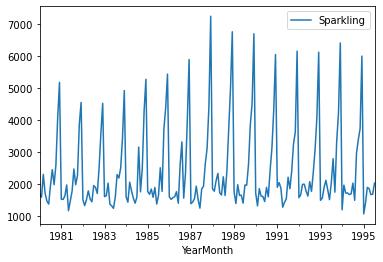

In [13]:
df.plot()
plt.show()

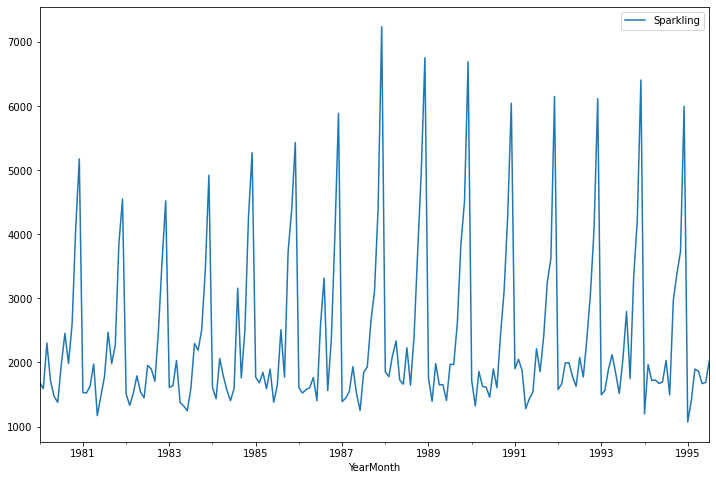

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

In [15]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [16]:
df['1983']

,Sparkling
YearMonth,
1983-01-01,1609
1983-02-01,1638
1983-03-01,2030
1983-04-01,1375
1983-05-01,1320
1983-06-01,1245
1983-07-01,1600
1983-08-01,2298
1983-09-01,2191


In [17]:
import seaborn as sns

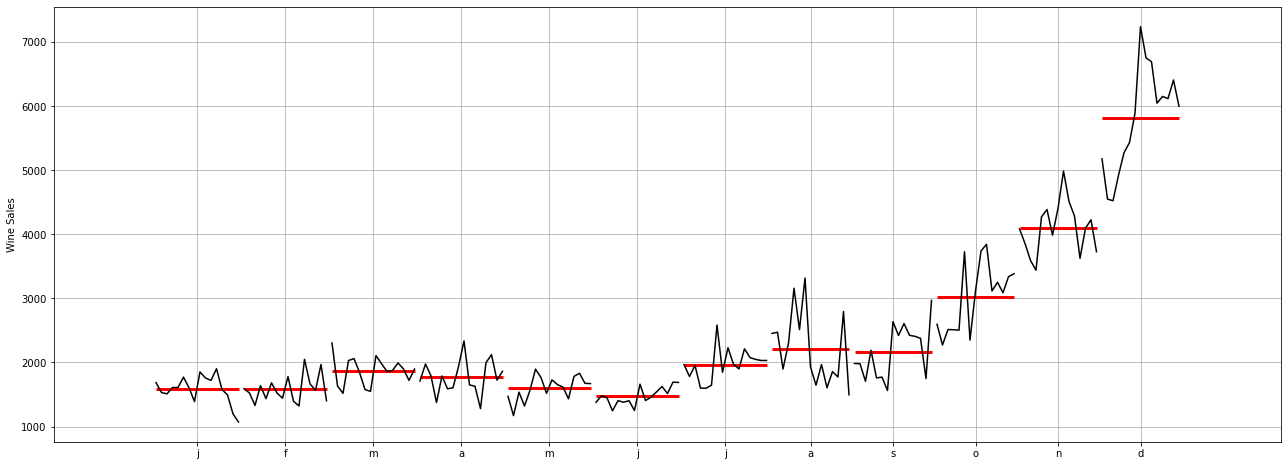

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();

In [19]:
df.shape

(187, 1)

In [20]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [22]:
print(df.var())

Sparkling    1.677314e+06
dtype: float64


In [23]:
print(df.std())

Sparkling    1295.11154
dtype: float64


In [24]:
#ADDITIVE DECOMPOSITION

In [25]:
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

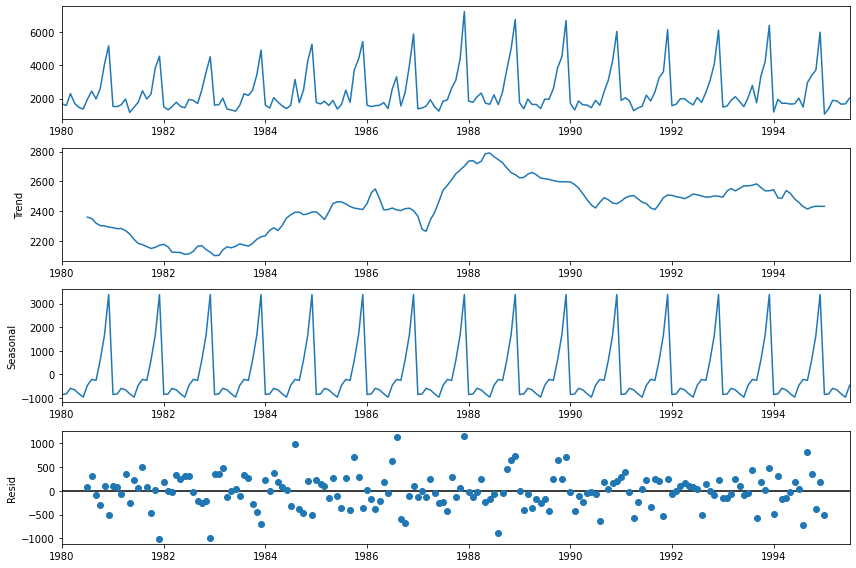

In [26]:
df_add_decompose.plot()
plt.show()

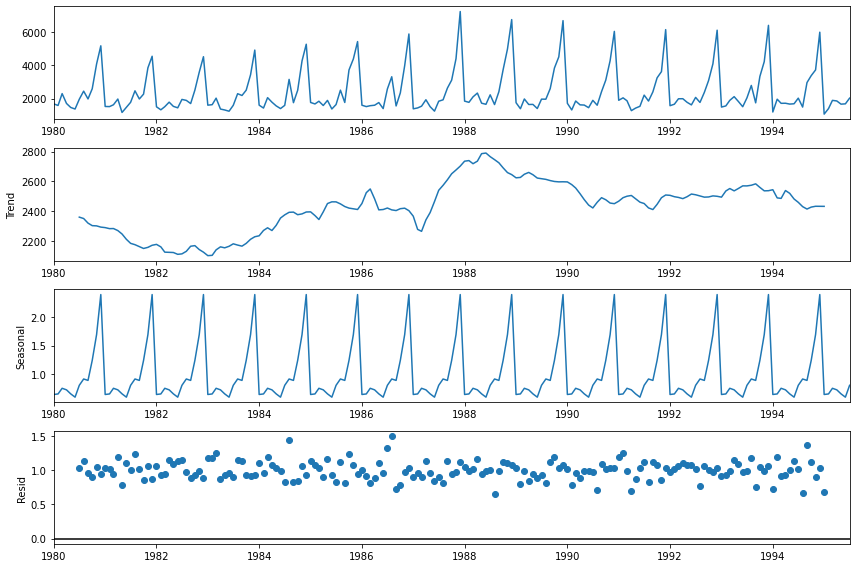

In [27]:
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

In [28]:
import sklearn
import statsmodels

In [29]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [30]:
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [66]:
pip install statsmodels==0.12.0

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Muthu' is not recognized as an internal or external command,
operable program or batch file.


SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [31]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [33]:
model_SES_autofit.params

{'smoothing_level': 0.06792438996885407,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1731.7788568306646,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-02-01    2735.276431
1991-03-01    2735.276431
1991-04-01    2735.276431
1991-05-01    2735.276431
1991-06-01    2735.276431
1991-07-01    2735.276431
1991-08-01    2735.276431
1991-09-01    2735.276431
1991-10-01    2735.276431
1991-11-01    2735.276431
1991-12-01    2735.276431
1992-01-01    2735.276431
1992-02-01    2735.276431
1992-03-01    2735.276431
1992-04-01    2735.276431
1992-05-01    2735.276431
1992-06-01    2735.276431
1992-07-01    2735.276431
1992-08-01    2735.276431
1992-09-01    2735.276431
1992-10-01    2735.276431
1992-11-01    2735.276431
1992-12-01    2735.276431
1993-01-01    2735.276431
1993-02-01    2735.276431
1993-03-01    2735.276431
1993-04-01    2735.276431
1993-05-01    2735.276431
1993-06-01    2735.276431
1993-07-01    2735.276431
1993-08-01    2735.276431
1993-09-01    2735.276431
1993-10-01    2735.276431
1993-11-01    2735.276431
1993-12-01    2735.276431
1994-01-01    2735.276431
1994-02-01    2735.276431
1994-03-01    2735.276431
1994-04-01  

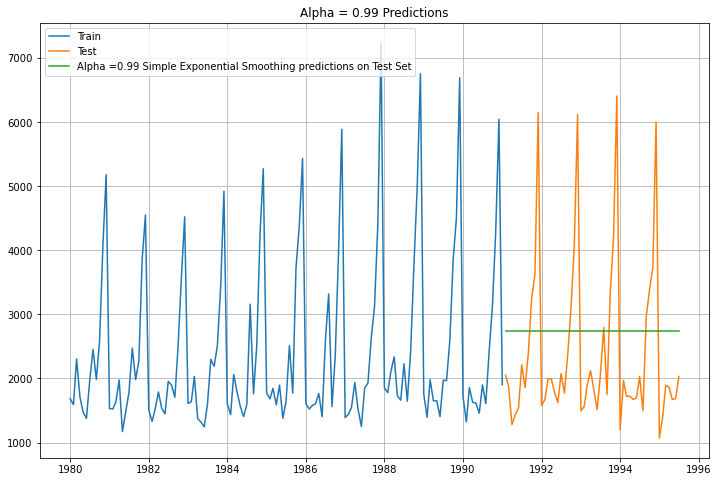

In [35]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [36]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [37]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1325.94787235103
SES RMSE (calculated using statsmodels): 1325.94787235103


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1325.947872


Holt - ETS(A, A, N) - Holt's linear method with additive errors¶
Double Exponential Smoothing

In [39]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07610236778916578, 'smoothing_trend': 0.06918687556155576, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.4111842806385, 'initial_trend': 2.4103050026973563, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [40]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-02-01    2772.362918
1991-03-01    2781.366041
1991-04-01    2790.369164
1991-05-01    2799.372286
1991-06-01    2808.375409
1991-07-01    2817.378532
1991-08-01    2826.381654
1991-09-01    2835.384777
1991-10-01    2844.387900
1991-11-01    2853.391022
1991-12-01    2862.394145
1992-01-01    2871.397268
1992-02-01    2880.400390
1992-03-01    2889.403513
1992-04-01    2898.406636
1992-05-01    2907.409758
1992-06-01    2916.412881
1992-07-01    2925.416004
1992-08-01    2934.419126
1992-09-01    2943.422249
1992-10-01    2952.425372
1992-11-01    2961.428495
1992-12-01    2970.431617
1993-01-01    2979.434740
1993-02-01    2988.437863
1993-03-01    2997.440985
1993-04-01    3006.444108
1993-05-01    3015.447231
1993-06-01    3024.450353
1993-07-01    3033.453476
1993-08-01    3042.456599
1993-09-01    3051.459721
1993-10-01    3060.462844
1993-11-01    3069.465967
1993-12-01    3078.469089
1994-01-01    3087.472212
1994-02-01    3096.475335
1994-03-01    3105.478457
1994-04-01  

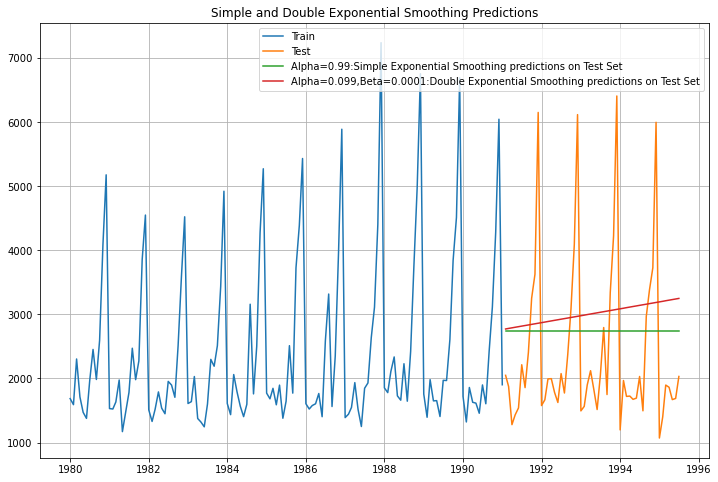

In [41]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [42]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1423.8484691935098


In [43]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1325.947872
"Alpha=1,Beta=0.0189:DES",1423.848469


Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [44]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07569306002446012, 'smoothing_trend': 0.032430788691794284, 'smoothing_seasonal': 0.4793949786640147, 'damping_trend': nan, 'initial_level': 2356.5286760693302, 'initial_trend': -0.8564858231202127, 'initial_seasons': array([-636.2427231 , -722.99134584, -398.6334684 , -473.44420406,
       -808.44211574, -815.36470643, -384.23728522,   72.99645263,
       -237.4574486 ,  272.31945661, 1541.39521516, 2590.08876135]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [45]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-02-01    1294.368857
1991-03-01    1775.352627
1991-04-01    1628.615207
1991-05-01    1534.584264
1991-06-01    1349.320456
1991-07-01    1869.699774
1991-08-01    1725.994375
1991-09-01    2366.913547
1991-10-01    3276.986804
1991-11-01    4351.117902
1991-12-01    6271.155285
1992-01-01    1573.390275
1992-02-01    1277.301517
1992-03-01    1758.285287
1992-04-01    1611.547866
1992-05-01    1517.516924
1992-06-01    1332.253115
1992-07-01    1852.632434
1992-08-01    1708.927035
1992-09-01    2349.846207
1992-10-01    3259.919464
1992-11-01    4334.050561
1992-12-01    6254.087945
1993-01-01    1556.322935
1993-02-01    1260.234177
1993-03-01    1741.217946
1993-04-01    1594.480526
1993-05-01    1500.449583
1993-06-01    1315.185775
1993-07-01    1835.565094
1993-08-01    1691.859694
1993-09-01    2332.778867
1993-10-01    3242.852124
1993-11-01    4316.983221
1993-12-01    6237.020605
1994-01-01    1539.255595
1994-02-01    1243.166836
1994-03-01    1724.150606
1994-04-01  

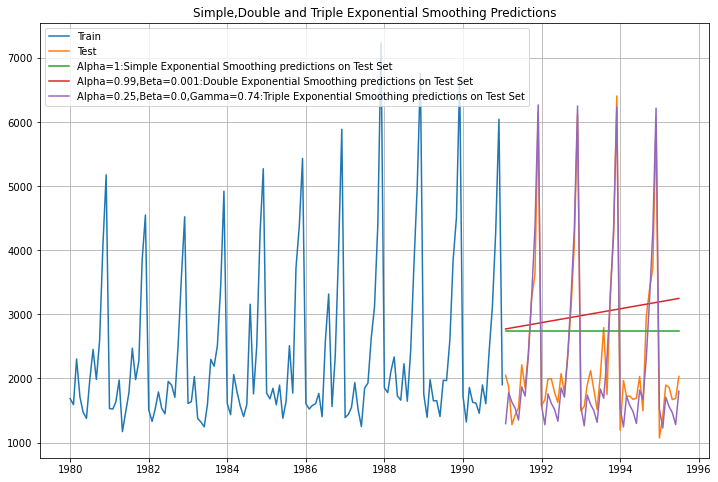

In [46]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [47]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 351.57767358855267


In [48]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1325.947872
"Alpha=1,Beta=0.0189:DES",1423.848469
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",351.577674


Holt-Winters - ETS(A, A, M) - Holt Winter's linear method¶
ETS(A, A, M) model

In [49]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07563870279415608, 'smoothing_trend': 0.06476829707206949, 'smoothing_seasonal': 0.34293847575580944, 'damping_trend': nan, 'initial_level': 2356.137252517868, 'initial_trend': -11.696440537019855, 'initial_seasons': array([0.73531642, 0.68170328, 0.89442043, 0.79543201, 0.64444879,
       0.63918364, 0.86923029, 1.11978841, 0.90542793, 1.20129153,
       1.86023262, 2.3717802 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [50]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-02-01    1410.786386
1991-03-01    1818.627982
1991-04-01    1713.215513
1991-05-01    1586.782375
1991-06-01    1394.015808
1991-07-01    1909.684687
1991-08-01    1896.976316
1991-09-01    2312.363617
1991-10-01    3192.967598
1991-11-01    4245.432417
1991-12-01    6045.151506
1992-01-01    1601.585142
1992-02-01    1376.465304
1992-03-01    1774.295206
1992-04-01    1671.367371
1992-05-01    1547.943513
1992-06-01    1359.825457
1992-07-01    1862.750849
1992-08-01    1850.259128
1992-09-01    2255.299498
1992-10-01    3114.009707
1992-11-01    4140.231664
1992-12-01    5895.044197
1993-01-01    1561.733678
1993-02-01    1342.144221
1993-03-01    1729.962430
1993-04-01    1629.519228
1993-05-01    1509.104652
1993-06-01    1325.635106
1993-07-01    1815.817010
1993-08-01    1803.541940
1993-09-01    2198.235379
1993-10-01    3035.051816
1993-11-01    4035.030912
1993-12-01    5744.936888
1994-01-01    1521.882215
1994-02-01    1307.823139
1994-03-01    1685.629654
1994-04-01  

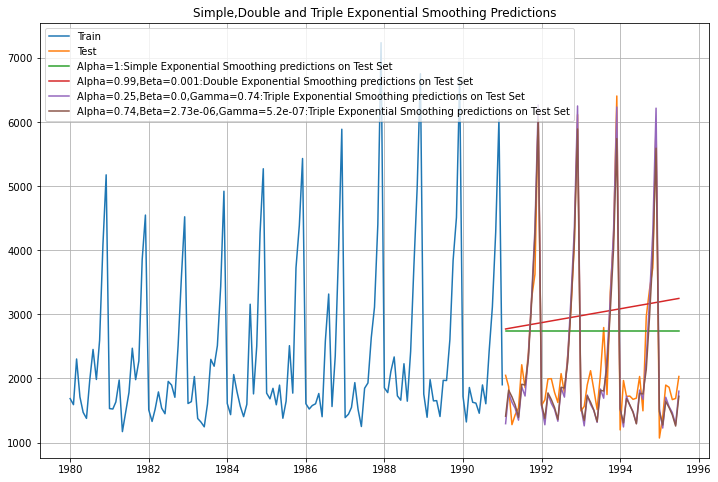

In [51]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [206]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 2139.1227750213075


In [53]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1325.947872
"Alpha=1,Beta=0.0189:DES",1423.848469
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",351.577674
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",348.655594


In [54]:
print(df.shape)
print(train.shape)
print(test.shape)

(187, 1)
(133, 1)
(54, 1)


Linear Regression

In [55]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [56]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [57]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [61]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

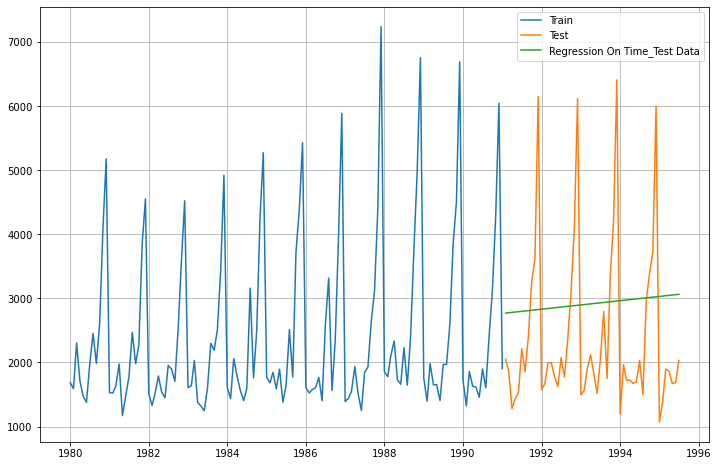

In [62]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [63]:
from sklearn import metrics

In [65]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1383.347 


In [66]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145


Naive Approach

In [67]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [68]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-02-01    1902
1991-03-01    1902
1991-04-01    1902
1991-05-01    1902
1991-06-01    1902
Name: naive, dtype: int64

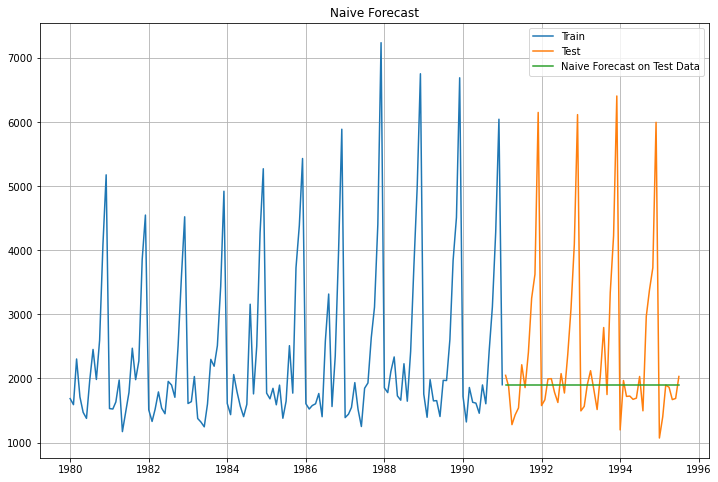

In [70]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [71]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1381.177


In [74]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135


Simple Average

In [75]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()



In [76]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-02-01,2049,2400.007519
1991-03-01,1874,2400.007519
1991-04-01,1279,2400.007519
1991-05-01,1432,2400.007519
1991-06-01,1540,2400.007519


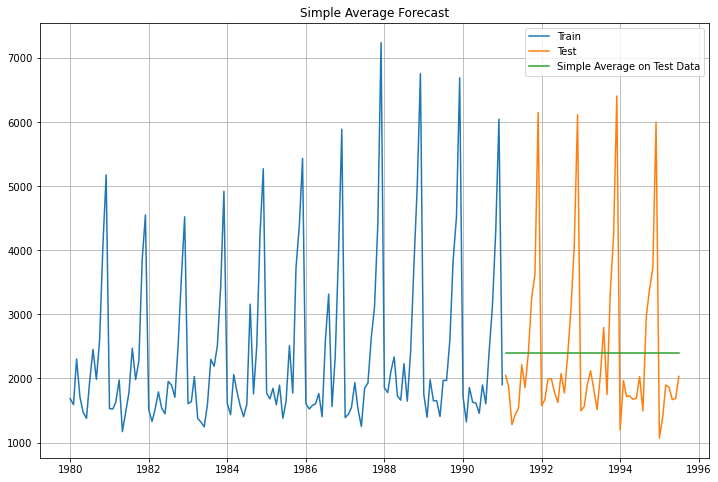

In [77]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [79]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1285.040


In [80]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964


Moving Average(MA)

In [81]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [83]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


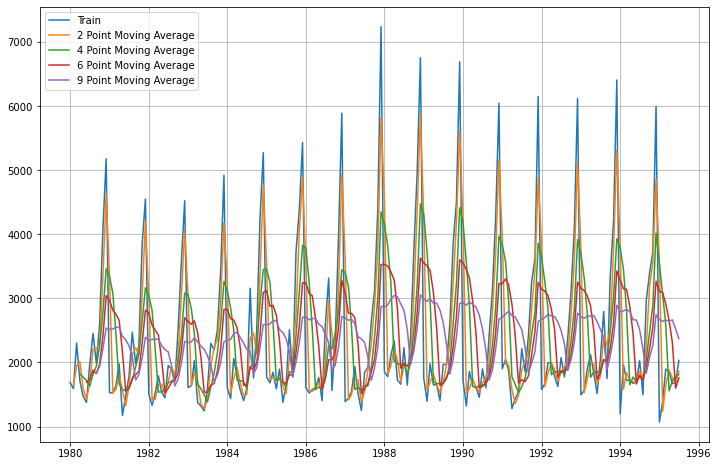

In [85]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [86]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<='1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

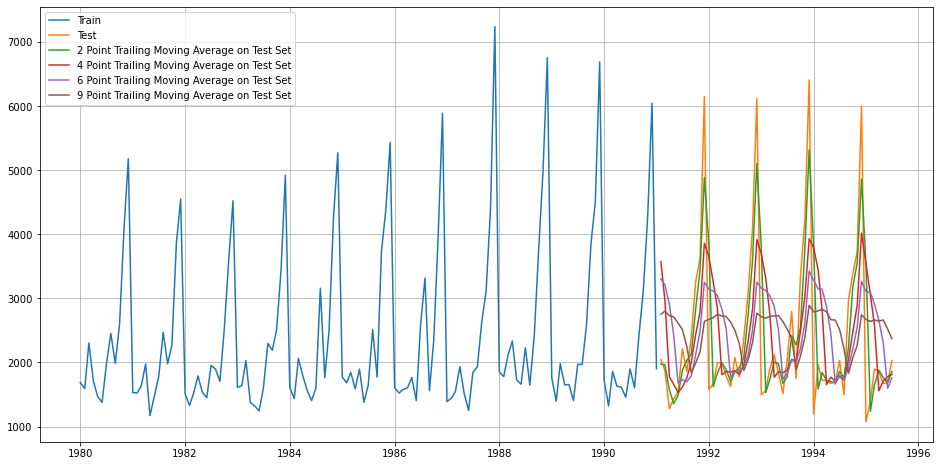

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [89]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Training Data,  RMSE is 770.929
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1137.137
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.097
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1354.278


In [90]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1383.347145
NaiveModel,1381.177135
SimpleAverageModel,1285.039964
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993
9pointTrailingMovingAverage,1354.277938


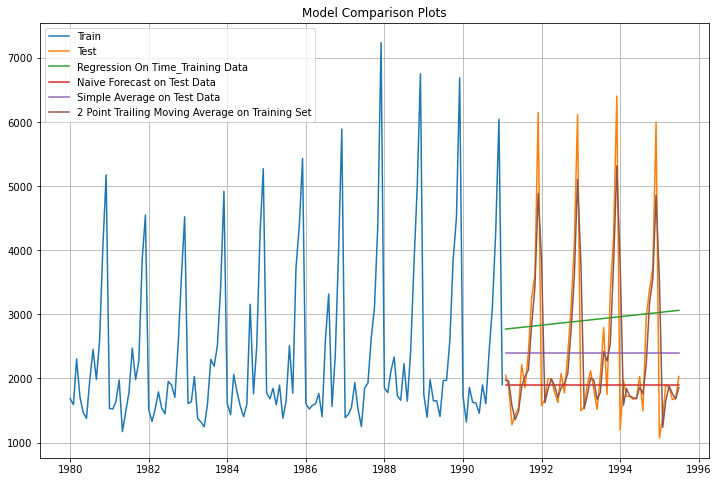

In [92]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [93]:
from statsmodels.tsa.stattools import adfuller

In [94]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932397
Number of lags used 12


In [95]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


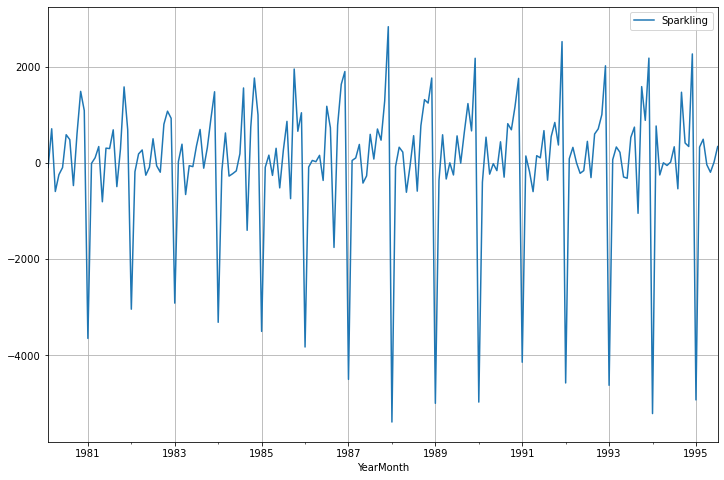

In [96]:
df.diff().dropna().plot(grid=True);

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

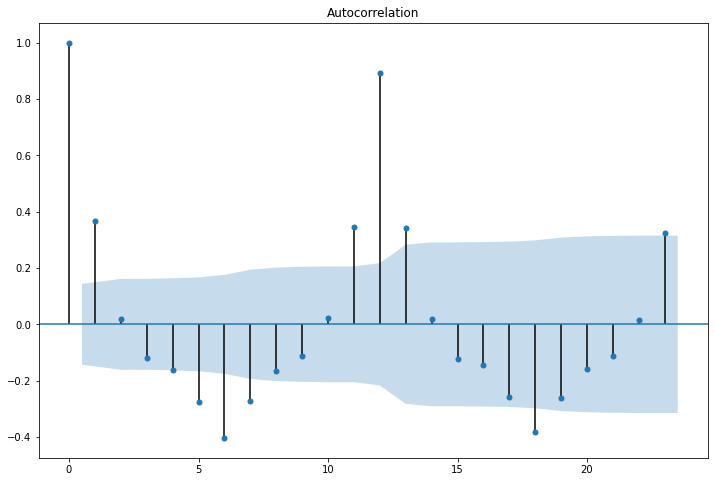

In [98]:
plot_acf(df,alpha=0.05);

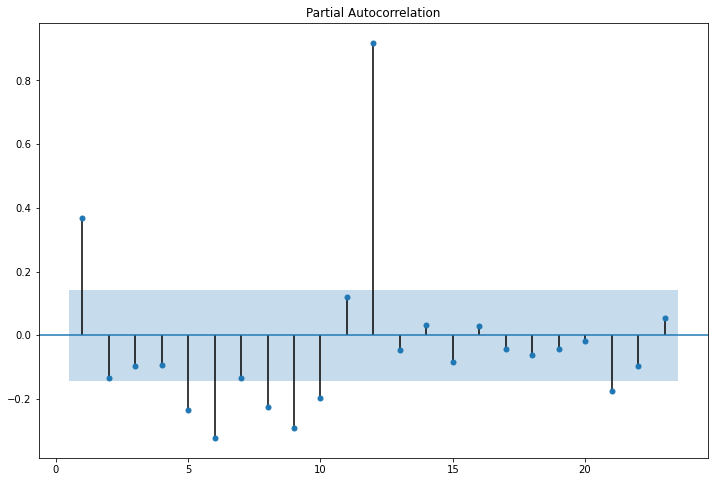

In [99]:
plot_pacf(df,zero=False,alpha=0.05);

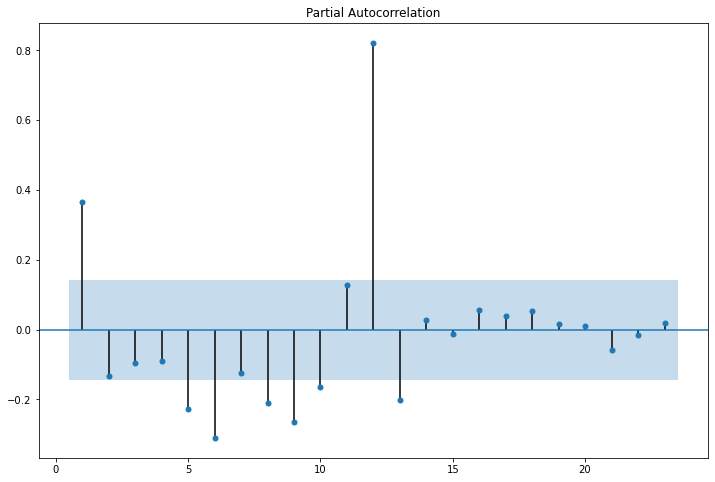

In [100]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [101]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [102]:
print(train.shape)
print(test.shape)

(133, 1)
(54, 1)


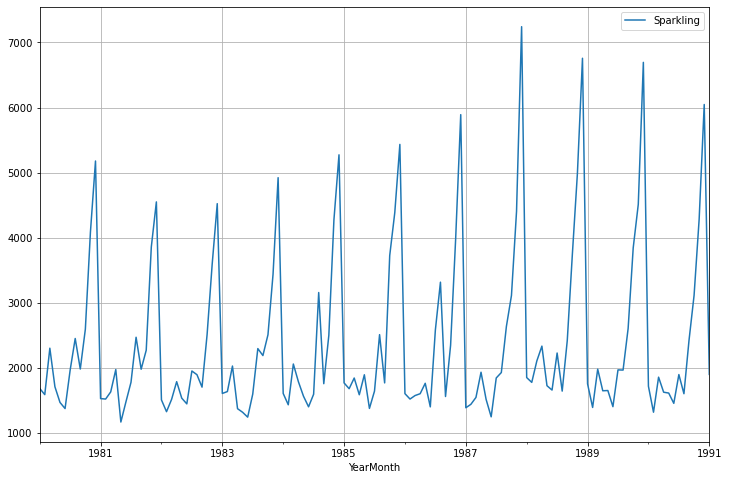

In [103]:
train.plot(grid=True);

In [104]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.106
DF test p-value is 0.5426117156065193
Number of lags used 12


In [105]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.132
DF test p-value is 3.541590788854729e-11
Number of lags used 11


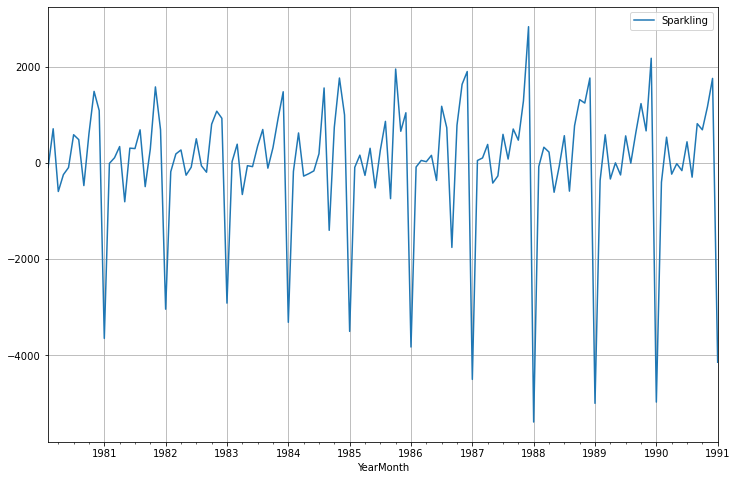

In [106]:
train.diff().dropna().plot(grid=True);

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 1980-01-01 to 1991-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  133 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [108]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [109]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [111]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2292.766395774394
ARIMA(0, 1, 1) - AIC:2276.3405559122716
ARIMA(0, 1, 2) - AIC:2252.702015280558
ARIMA(0, 1, 3) - AIC:2253.267212391598
ARIMA(1, 1, 0) - AIC:2290.700315050187
ARIMA(1, 1, 1) - AIC:2254.7872146753707


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2253.7280897869723


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3) - AIC:2254.81179236117
ARIMA(2, 1, 0) - AIC:2283.400213742255
ARIMA(2, 1, 1) - AIC:2252.6377018835037
ARIMA(2, 1, 2) - AIC:2233.915271065568


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2250.8579243717686
ARIMA(3, 1, 0) - AIC:2279.9195034138866
ARIMA(3, 1, 1) - AIC:2254.141558783518


C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 1, 2) - AIC:2249.4637182028755
ARIMA(3, 1, 3) - AIC:2240.308168643929


In [112]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2233.915271
15,"(3, 1, 3)",2240.308169
14,"(3, 1, 2)",2249.463718
11,"(2, 1, 3)",2250.857924
9,"(2, 1, 1)",2252.637702


In [166]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  133
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1111.958
Date:                Sun, 25 Apr 2021   AIC                           2233.915
Time:                        19:57:10   BIC                           2248.329
Sample:                    01-01-1980   HQIC                          2239.772
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2780      0.047     27.378      0.000       1.187       1.369
ar.L2         -0.5238      0.069     -7.566      0.000      -0.659      -0.388
ma.L1         -1.9916      0.107    -18.693      0.0

Diagnostics plot.

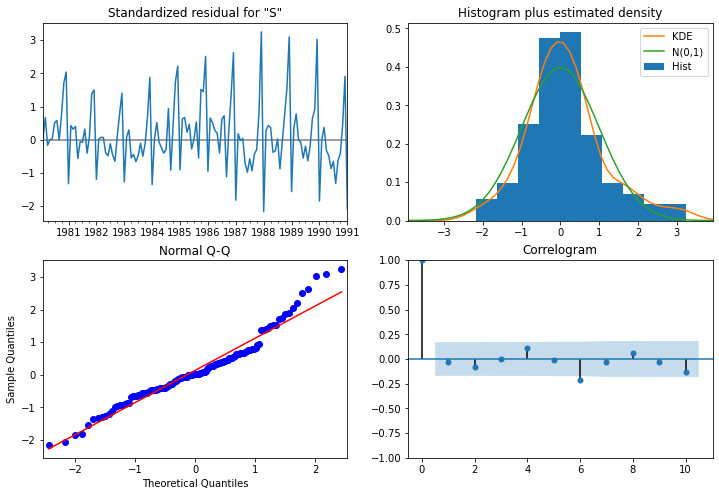

In [167]:
results_auto_ARIMA.plot_diagnostics();

Predict on the Test Set using this model and evaluate the model.

In [168]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [169]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [170]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1298.6786408107694 
MAPE: 46.53732743888118


In [171]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678641,46.537327


Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

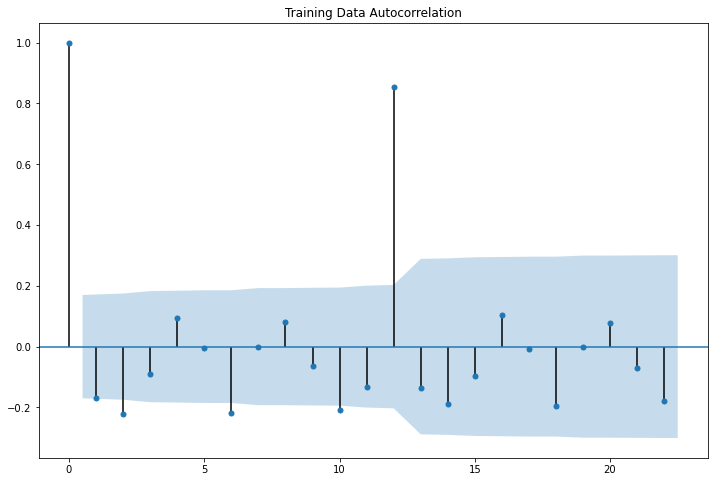

In [122]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [123]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [124]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [126]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2276.40438968189
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2177.258796857992
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1975.4080224237748
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1882.3068614709837
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2189.1670399625896
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2097.2453457518855
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1943.6309086916226
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1818.578443906738
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1854.8097940366945
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1856.6066895205427
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1829.1959220064623
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1741.0635494514997
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1764.2340472076608
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1766.170951675651
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1755.5287626657941
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1742.9893112251348
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2251.8815378150393
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2138.103778622557
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC

In [157]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1644.844466
251,"(3, 1, 3)","(2, 0, 3, 6)",1646.662021
59,"(0, 1, 3)","(2, 0, 3, 6)",1648.856844
63,"(0, 1, 3)","(3, 0, 3, 6)",1650.615787
123,"(1, 1, 3)","(2, 0, 3, 6)",1650.927435


In [173]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  133
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -811.422
Date:                           Sun, 25 Apr 2021   AIC                           1644.844
Time:                                   19:58:01   BIC                           1674.550
Sample:                               01-01-1980   HQIC                          1656.893
                                    - 01-01-1991                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7397      0.087    -20.095      0.000      -1.909      -1.570
ar.L2         -0.7825      0.082     -9.501

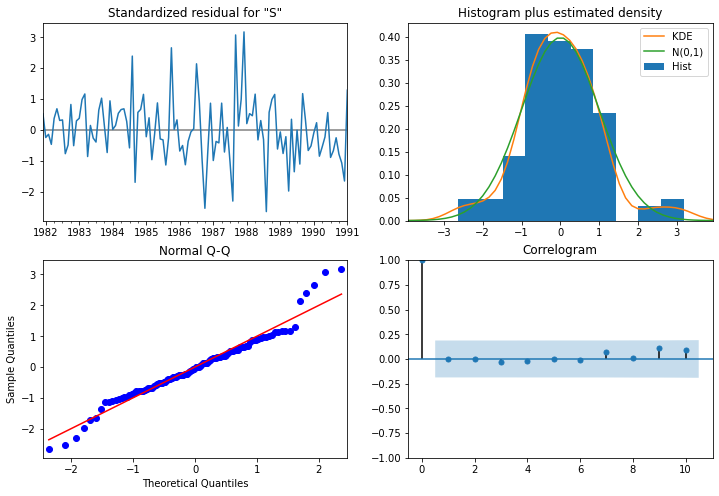

In [174]:
results_auto_SARIMA.plot_diagnostics();

In [175]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [176]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-02-01,1184.570691,368.200559,462.910857,1906.230526
1991-03-01,1692.841727,384.978023,938.298667,2447.384787
1991-04-01,1721.804812,385.879432,965.495023,2478.114601
1991-05-01,1211.223736,395.130713,436.781770,1985.665702
1991-06-01,1112.833584,395.126991,338.398914,1887.268255


In [177]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 652.178782253722 
MAPE: 26.644145549331654


In [179]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678641,46.537327
"SARIMA(2,1,3)(2,0,3,6)",652.178782,26.644146


Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

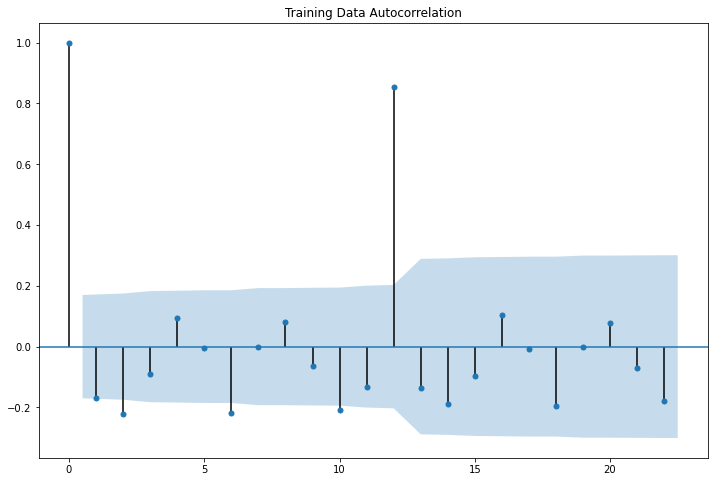

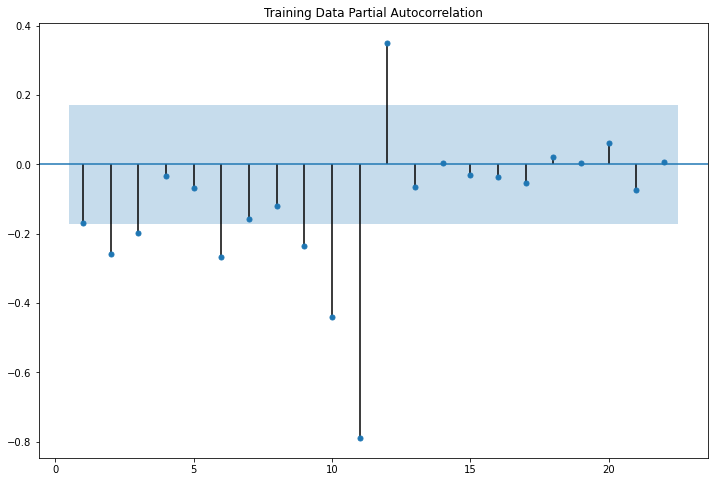

In [180]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [182]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,3),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  133
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1119.429
Date:                Sun, 25 Apr 2021   AIC                           2250.858
Time:                        20:09:42   BIC                           2268.155
Sample:                    01-01-1980   HQIC                          2257.887
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8799      0.163     -5.392      0.000      -1.200      -0.560
ar.L2         -0.4825      0.147     -3.293      0.001      -0.770      -0.195
ma.L1          0.3725      0.089      4.196      0.0

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


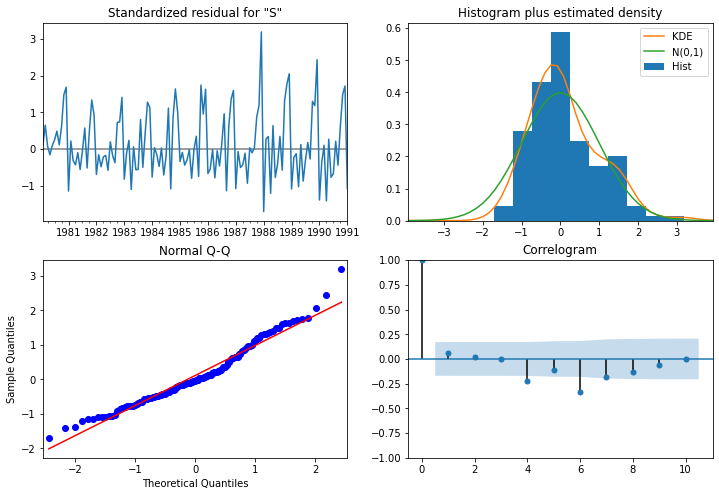

In [183]:
results_manual_ARIMA.plot_diagnostics();

In [184]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [188]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1295.659356840462 
MAPE: 43.91267149899703


In [189]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678641,46.537327
"SARIMA(2,1,3)(2,0,3,6)",652.178782,26.644146
"ARIMA(2,1,3)",1295.659357,43.912671


Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

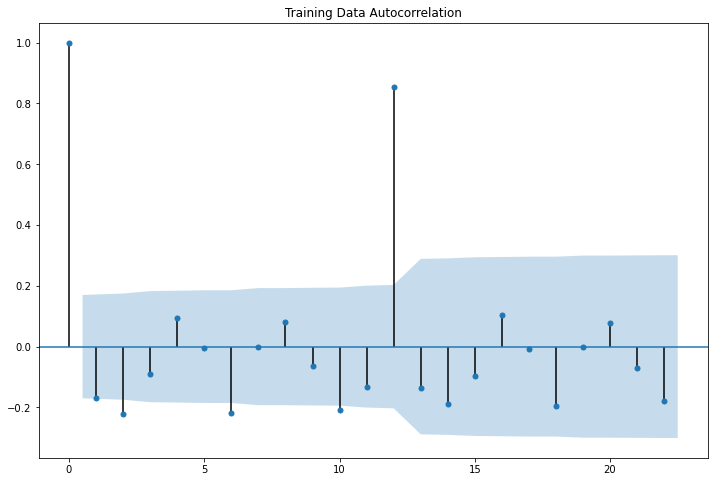

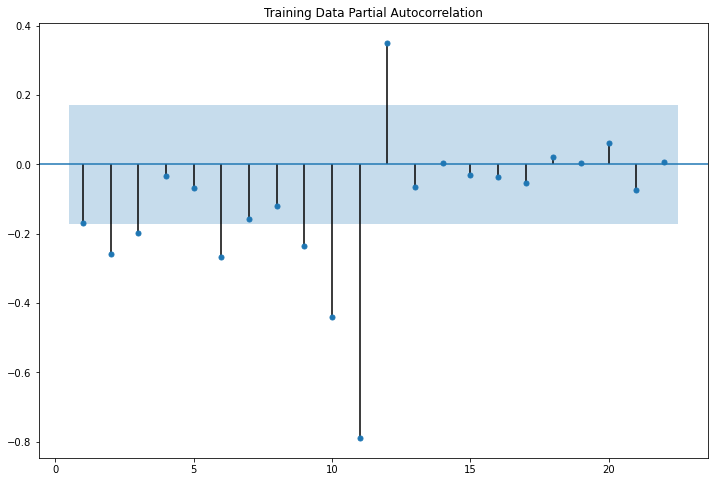

In [190]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [191]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  133
Model:             SARIMAX(2, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -882.050
Date:                           Sun, 25 Apr 2021   AIC                           1782.101
Time:                                   20:15:41   BIC                           1806.405
Sample:                               01-01-1980   HQIC                          1791.958
                                    - 01-01-1991                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7416      0.010    166.175      0.000       1.721       1.762
ar.L2         -1.0087      0.009   -110.410

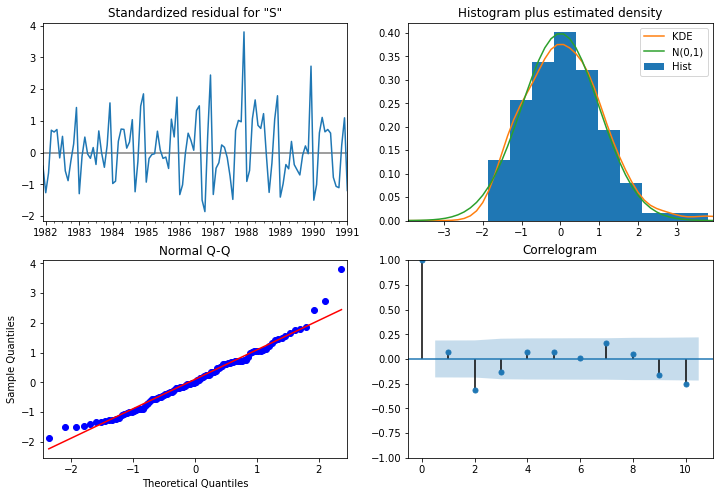

In [192]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [193]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [195]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1080.0073563113572 
MAPE: 45.591509535714565


In [196]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678641,46.537327
"SARIMA(2,1,3)(2,0,3,6)",652.178782,26.644146
"ARIMA(2,1,3)",1295.659357,43.912671
"SARIMA(2,1,3)(0,0,3,6)",1080.007356,45.591510


Consolidated dataframe of all RMSE values of all models built are given in the answer report

Full data forecast

In [223]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(2,1,3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood               -1208.610
Date:                           Sun, 25 Apr 2021   AIC                           2439.220
Time:                                   21:53:59   BIC                           2473.319
Sample:                               01-01-1980   HQIC                          2453.063
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3260      0.498      0.654      0.513      -0.651       1.303
ar.L2          0.2452      0.409      0.599

In [224]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [225]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1823.637046,375.005083,1088.640589,2558.633504
1995-09-01,2371.457136,380.310440,1626.062371,3116.851901
1995-10-01,3255.476265,380.535992,2509.639425,4001.313105
1995-11-01,4019.083171,381.298584,3271.751680,4766.414663
1995-12-01,6272.277028,381.700210,5524.158365,7020.395692


In [226]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 564.2711896574366


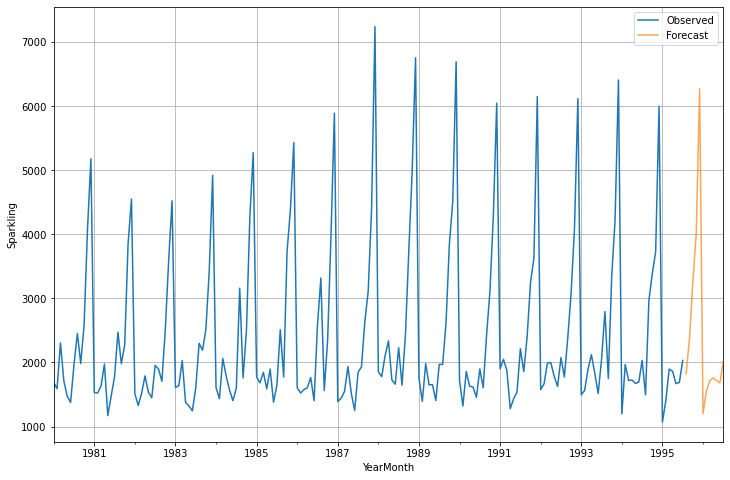

In [227]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [228]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678641,46.537327
"SARIMA(2,1,3)(2,0,3,6)",652.178782,26.644146
"ARIMA(2,1,3)",1295.659357,43.912671
"SARIMA(2,1,3)(0,0,3,6)",1080.007356,45.591510
